In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Introdunction

In [118]:
file_path = '../dataset/drt2568_0809.csv'

In [119]:
df = pd.read_csv(file_path)

In [120]:
df.head()

,No.,Month,Year,Line,Number_Accident,Delay,Solving_Problem,Traction_System,Brake_System,Door_System,Electrification_System,Rail/Third Rail,Turnout_Point_Machine,Axel_Counter,Signalling_System,External,Other
0,1,มิถุนายน,2565,สายสีเขียว (สายสุขุมวิท),3,41,88,2,1,0,0,0,0,0.0,0,0,0
1,2,มิถุนายน,2565,สายสีเขียว (สายสีลม),1,37,104,0,0,0,0,0,1,0.0,0,0,0
2,3,มิถุนายน,2565,สายสีทอง,0,0,0,0,0,0,0,0,0,0.0,0,0,0
3,4,มิถุนายน,2565,สายสีน้ำเงิน,6,19,19,2,1,3,0,0,0,0.0,0,0,0
4,5,มิถุนายน,2565,สายสีม่วง,0,0,0,0,0,0,0,0,0,0.0,0,0,0


In [121]:
df.columns

Index(['No.', 'Month', 'Year', 'Line', 'Number_Accident', 'Delay',
       'Solving_Problem', 'Traction_System', 'Brake_System', 'Door_System',
       'Electrification_System', 'Rail/Third Rail', 'Turnout_Point_Machine',
       'Axel_Counter', 'Signalling_System', 'External', 'Other'],
      dtype='object')

In [122]:
df.shape

(370, 17)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No.                     370 non-null    int64  
 1   Month                   370 non-null    object 
 2   Year                    370 non-null    int64  
 3   Line                    370 non-null    object 
 4   Number_Accident         370 non-null    int64  
 5   Delay                   370 non-null    int64  
 6   Solving_Problem         370 non-null    int64  
 7   Traction_System         370 non-null    int64  
 8   Brake_System            370 non-null    int64  
 9   Door_System             370 non-null    int64  
 10  Electrification_System  370 non-null    int64  
 11  Rail/Third Rail         370 non-null    int64  
 12  Turnout_Point_Machine   370 non-null    int64  
 13  Axel_Counter            369 non-null    float64
 14  Signalling_System       370 non-null    in

# Data Cleaning & Handling Outliers

In [124]:
df[df['Axel_Counter'].isnull()]

,No.,Month,Year,Line,Number_Accident,Delay,Solving_Problem,Traction_System,Brake_System,Door_System,Electrification_System,Rail/Third Rail,Turnout_Point_Machine,Axel_Counter,Signalling_System,External,Other
178,177,กุมภาพันธ์,2567,สายสีเหลือง,0,0,0,0,0,0,0,0,0,NaN,0,0,0


จากข้อมูลที่มีค่า NaN เราพบว่า จำนวนเหตุขัดข้องรวมทั้งหมดเท่ากับ 0 ดังนั้น จำนวนที่ Axel Counter เกิดเหตุขัดข้องที่เป็น NaN อยู่ เราจะเติมค่า 0 ไป เพื่อให้รวมจำนวนที่ระบบที่เกิดเหตุขัดข้องเท่ากับ จำนวนเหตุขัดข้องทั้งหมด

In [125]:
# เติม 0 แทนที่ค่าที่เป็น NaN 
df['Axel_Counter'] = df['Axel_Counter'].fillna(0)

In [126]:
df.isnull().sum()

No.                       0
Month                     0
Year                      0
Line                      0
Number_Accident           0
Delay                     0
Solving_Problem           0
Traction_System           0
Brake_System              0
Door_System               0
Electrification_System    0
Rail/Third Rail           0
Turnout_Point_Machine     0
Axel_Counter              0
Signalling_System         0
External                  0
Other                     0
dtype: int64

In [127]:
# ตรวจสอบแถวที่มีข้อมูลซ้ำ
df.duplicated().sum()

0

In [128]:
# เปลี่ยนชื่อคอลัมน์ให้ใช้งานง่ายขึ้น
column_rename = {
    'No.': 'id',
    'Month': 'month',
    'Year': 'year',
    'Line': 'line',
    'Number_Accident': 'accident_count',
    'Delay': 'delay_minutes',
    'Solving_Problem': 'solving_time_minutes',
    'Traction_System': 'traction_sys',
    'Brake_System': 'brake_sys',
    'Door_System': 'door_sys',
    'Electrification_System': 'electric_sys',
    'Rail/Third Rail': 'rail_sys',
    'Turnout_Point_Machine': 'turnout_machine',
    'Axel_Counter': 'axel_counter',
    'Signalling_System': 'signalling_sys',
    'External': 'external_factors',
    'Other': 'others'
}

df.rename(columns=column_rename, inplace=True)

In [129]:
df.columns

Index(['id', 'month', 'year', 'line', 'accident_count', 'delay_minutes',
       'solving_time_minutes', 'traction_sys', 'brake_sys', 'door_sys',
       'electric_sys', 'rail_sys', 'turnout_machine', 'axel_counter',
       'signalling_sys', 'external_factors', 'others'],
      dtype='object')

In [130]:
df.set_index('id')

,month,year,line,accident_count,delay_minutes,solving_time_minutes,traction_sys,brake_sys,door_sys,electric_sys,rail_sys,turnout_machine,axel_counter,signalling_sys,external_factors,others
id,,,,,,,,,,,,,,,,
1,มิถุนายน,2565,สายสีเขียว (สายสุขุมวิท),3,41,88,2,1,0,0,0,0,0.0,0,0,0
2,มิถุนายน,2565,สายสีเขียว (สายสีลม),1,37,104,0,0,0,0,0,1,0.0,0,0,0
3,มิถุนายน,2565,สายสีทอง,0,0,0,0,0,0,0,0,0,0.0,0,0,0
4,มิถุนายน,2565,สายสีน้ำเงิน,6,19,19,2,1,3,0,0,0,0.0,0,0,0
5,มิถุนายน,2565,สายสีม่วง,0,0,0,0,0,0,0,0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,กันยายน,2568,รถไฟฟ้าเชื่อมท่าอากาศยานสุวรรณภูมิ (Airport Ra...,2,14,14,0,0,1,0,0,0,0.0,0,0,1
365,กันยายน,2568,สายสีแดงเหนือ,0,0,0,0,0,0,0,0,0,0.0,0,0,0
366,กันยายน,2568,สายสีแดงตะวันตก,2,16,33,0,0,0,0,0,0,1.0,0,0,1


In [131]:
df['line'].unique()

array(['สายสีเขียว (สายสุขุมวิท)', 'สายสีเขียว (สายสีลม)', 'สายสีทอง',
       'สายสีน้ำเงิน ', 'สายสีม่วง',
       'รถไฟฟ้าเชื่อมท่าอากาศยานสุวรรณภูมิ (Airport Rail Link)',
       'สายสีแดงเหนือ', 'สายสีแดงตะวันตก', 'สายสีเหลือง', 'สายสีชมพู'],
      dtype=object)

In [132]:
# ลบช่องว่างใน string 
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

In [133]:
print(df['month'].unique())
print("\n")
print(df['line'].unique())

['มิถุนายน' 'กรกฎาคม' 'สิงหาคม' 'กันยายน' 'ตุลาคม' 'พฤศจิกายน' 'ธันวาคม'
 'มกราคม' 'กุมภาพันธ์' 'มีนาคม' 'เมษายน' 'พฤษภาคม']


['สายสีเขียว (สายสุขุมวิท)' 'สายสีเขียว (สายสีลม)' 'สายสีทอง'
 'สายสีน้ำเงิน' 'สายสีม่วง'
 'รถไฟฟ้าเชื่อมท่าอากาศยานสุวรรณภูมิ (Airport Rail Link)' 'สายสีแดงเหนือ'
 'สายสีแดงตะวันตก' 'สายสีเหลือง' 'สายสีชมพู']


In [134]:
# เปลี่ยนชื่อเดือนเป็นภาษาอังกฤษ
month_map = {
    'มกราคม': 'January',
    'กุมภาพันธ์': 'February',
    'มีนาคม': 'March',
    'เมษายน': 'April',
    'พฤษภาคม': 'May',
    'มิถุนายน': 'June',
    'กรกฎาคม': 'July',
    'สิงหาคม': 'August',
    'กันยายน': 'September',
    'ตุลาคม': 'October',
    'พฤศจิกายน': 'November',
    'ธันวาคม': 'December'
}

df['month'] = df['month'].map(month_map)

In [135]:
# เปลี่ยนชื่อสายรถไฟฟ้าเป็นภาษาอังกฤษ
line_map = {
    'สายสีเขียว (สายสุขุมวิท)': 'Green Line (Sukhumvit Line)',
    'สายสีเขียว (สายสีลม)': 'Green Line (Silom Line)',
    'สายสีทอง': 'Gold Line',
    'สายสีน้ำเงิน': 'Blue Line',
    'สายสีม่วง': 'Purple Line',
    'รถไฟฟ้าเชื่อมท่าอากาศยานสุวรรณภูมิ (Airport Rail Link)': 'Airport Rail Link',
    'สายสีเหลือง': 'Yellow Line',
    'สายสีชมพู': 'Pink Line',
    'สายสีแดงเหนือ': 'Red Line (North)',
    'สายสีแดงตะวันตก': 'Red Line (West)'
}

df['line'] = df['line'].replace(line_map)

In [136]:
df.head()

,id,month,year,line,accident_count,delay_minutes,solving_time_minutes,traction_sys,brake_sys,door_sys,electric_sys,rail_sys,turnout_machine,axel_counter,signalling_sys,external_factors,others
0,1,June,2565,Green Line (Sukhumvit Line),3,41,88,2,1,0,0,0,0,0.0,0,0,0
1,2,June,2565,Green Line (Silom Line),1,37,104,0,0,0,0,0,1,0.0,0,0,0
2,3,June,2565,Gold Line,0,0,0,0,0,0,0,0,0,0.0,0,0,0
3,4,June,2565,Blue Line,6,19,19,2,1,3,0,0,0,0.0,0,0,0
4,5,June,2565,Purple Line,0,0,0,0,0,0,0,0,0,0.0,0,0,0


In [137]:
df['line'].unique()

array(['Green Line (Sukhumvit Line)', 'Green Line (Silom Line)',
       'Gold Line', 'Blue Line', 'Purple Line', 'Airport Rail Link',
       'Red Line (North)', 'Red Line (West)', 'Yellow Line', 'Pink Line'],
      dtype=object)

In [138]:
# เพิ่มคอลัมน์เจ้าของโครงการรถไฟฟ้าและผู้ให้บริการรถไฟฟ้า เผื่อในการใช้วิเคราะห์เชิงลึก
rail_structure = {
    'Green Line (Sukhumvit Line)': {'owner': 'BMA', 'operator': 'BTS'},
    'Green Line (Silom Line)': {'owner': 'BMA', 'operator': 'BTS'},
    'Gold Line': {'owner': 'BMA', 'operator': 'BTS'},
    'Yellow Line': {'owner': 'MRT', 'operator': 'EBM'},
    'Pink Line': {'owner': 'MRT', 'operator': 'NBM'},
    'Blue Line': {'owner': 'MRT', 'operator': 'BEM'},
    'Purple Line': {'owner': 'MRT', 'operator': 'BEM'},
    'Airport Rail Link': {'owner': 'SRT', 'operator': 'AERA1'},
    'Red Line (North)': {'owner': 'SRT', 'operator': 'SRTET'},
    'Red Line (West)': {'owner': 'SRT', 'operator': 'SRTET'}
}

df['owner'] = [rail_structure[line]['owner'] for line in df['line']]
df['operator'] = [rail_structure[line]['operator'] for line in df['line']]

In [139]:
df.head()

,id,month,year,line,accident_count,delay_minutes,solving_time_minutes,traction_sys,brake_sys,door_sys,electric_sys,rail_sys,turnout_machine,axel_counter,signalling_sys,external_factors,others,owner,operator
0,1,June,2565,Green Line (Sukhumvit Line),3,41,88,2,1,0,0,0,0,0.0,0,0,0,BMA,BTS
1,2,June,2565,Green Line (Silom Line),1,37,104,0,0,0,0,0,1,0.0,0,0,0,BMA,BTS
2,3,June,2565,Gold Line,0,0,0,0,0,0,0,0,0,0.0,0,0,0,BMA,BTS
3,4,June,2565,Blue Line,6,19,19,2,1,3,0,0,0,0.0,0,0,0,MRT,BEM
4,5,June,2565,Purple Line,0,0,0,0,0,0,0,0,0,0.0,0,0,0,MRT,BEM


In [140]:
df_reordered = df.iloc[:, [0, 1, 2, 3, 17, 18, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16]]

In [141]:
df_reordered.head()

,id,month,year,line,owner,operator,accident_count,delay_minutes,solving_time_minutes,traction_sys,brake_sys,door_sys,electric_sys,rail_sys,turnout_machine,axel_counter,signalling_sys,external_factors,others
0,1,June,2565,Green Line (Sukhumvit Line),BMA,BTS,3,41,88,2,1,0,0,0,0,0.0,0,0,0
1,2,June,2565,Green Line (Silom Line),BMA,BTS,1,37,104,0,0,0,0,0,1,0.0,0,0,0
2,3,June,2565,Gold Line,BMA,BTS,0,0,0,0,0,0,0,0,0,0.0,0,0,0
3,4,June,2565,Blue Line,MRT,BEM,6,19,19,2,1,3,0,0,0,0.0,0,0,0
4,5,June,2565,Purple Line,MRT,BEM,0,0,0,0,0,0,0,0,0,0.0,0,0,0


In [142]:
df_reordered.shape

(370, 19)

In [143]:
df_reordered.columns

Index(['id', 'month', 'year', 'line', 'owner', 'operator', 'accident_count',
       'delay_minutes', 'solving_time_minutes', 'traction_sys', 'brake_sys',
       'door_sys', 'electric_sys', 'rail_sys', 'turnout_machine',
       'axel_counter', 'signalling_sys', 'external_factors', 'others'],
      dtype='object')

Text(0.5, 0.98, 'Individual Delay Distributions by Railway Line')

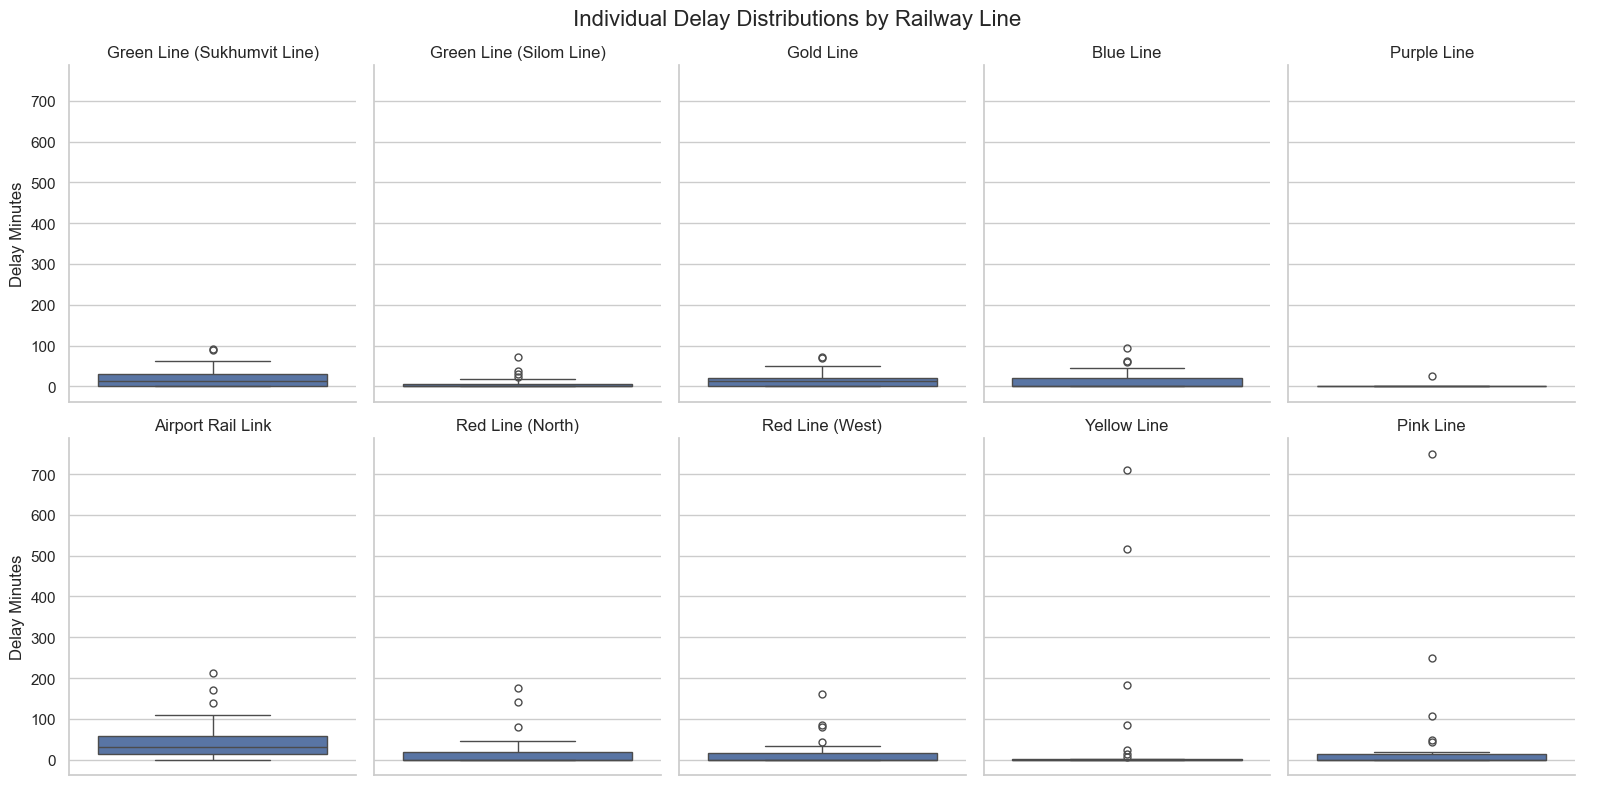

In [ ]:
# พล็อตกราฟ Boxplot เพื่อดูการกระจายตัวของข้อมูล delay minutes ของรถไฟฟ้าแต่ละสาย เพื่อระบุ outlier 
g = sns.catplot(
    data=df, 
    y='delay_minutes', 
    col='line',      
    kind='box',      
    col_wrap=5,      
    height=4,       
    aspect=0.8,     
)

g.set_titles("{col_name}")
g.set_axis_labels("", "Delay Minutes")
plt.subplots_adjust(top=0.91) 
g.fig.suptitle('Individual Delay Distributions by Railway Line', fontsize=16)

In [ ]:
def flag_line_outliers(df):
    """ฟังก์ชันสำหรับตรวจดูว่าข้อมูลไหนที่เป็น outlier โดยสร้างคอลัมน์ is_outlier แล้วกำหนดค่า True False"""
    df['is_outlier'] = False

    for line in df['line'].unique():
        line_data = df[df['line'] == line]['delay_minutes']

        # คำนวณ IQR
        q1 = line_data.quantile(0.25)
        q3 = line_data.quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr

        df.loc[(df['line'] == line) & (df['delay_minutes'] > upper_bound), 'is_outlier'] = True

    return df

df = flag_line_outliers(df_reordered)

C:\Users\phwy3\AppData\Local\Temp\ipykernel_23952\2040280115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_outlier'] = False


In [146]:
df.head()

,id,month,year,line,owner,operator,accident_count,delay_minutes,solving_time_minutes,traction_sys,brake_sys,door_sys,electric_sys,rail_sys,turnout_machine,axel_counter,signalling_sys,external_factors,others,is_outlier
0,1,June,2565,Green Line (Sukhumvit Line),BMA,BTS,3,41,88,2,1,0,0,0,0,0.0,0,0,0,False
1,2,June,2565,Green Line (Silom Line),BMA,BTS,1,37,104,0,0,0,0,0,1,0.0,0,0,0,True
2,3,June,2565,Gold Line,BMA,BTS,0,0,0,0,0,0,0,0,0,0.0,0,0,0,False
3,4,June,2565,Blue Line,MRT,BEM,6,19,19,2,1,3,0,0,0,0.0,0,0,0,False
4,5,June,2565,Purple Line,MRT,BEM,0,0,0,0,0,0,0,0,0,0.0,0,0,0,False


เราได้แล้วว่า ความล่าช้าปกติ กับ ความล่าช้าที่เกิดจากเหตุการณ์ผิดปกติคือข้อมูลไหนบ้าง เราจะแยกข้อมูลสองอย่างนี้เพื่อมาวิเคราะห์

# วิเคราะห์ว่าในวันปกติเวลาล่าช้าของแต่ละสายเป็นอย่างไรบ้าง

In [ ]:
# นำข้อมูลที่ไม่มี outlier มาวิเคราะห์
df_normal = df[df['is_outlier'] == False]

In [148]:
df_normal.shape

(336, 20)

In [149]:
df_normal.head()

,id,month,year,line,owner,operator,accident_count,delay_minutes,solving_time_minutes,traction_sys,brake_sys,door_sys,electric_sys,rail_sys,turnout_machine,axel_counter,signalling_sys,external_factors,others,is_outlier
0,1,June,2565,Green Line (Sukhumvit Line),BMA,BTS,3,41,88,2,1,0,0,0,0,0.0,0,0,0,False
2,3,June,2565,Gold Line,BMA,BTS,0,0,0,0,0,0,0,0,0,0.0,0,0,0,False
3,4,June,2565,Blue Line,MRT,BEM,6,19,19,2,1,3,0,0,0,0.0,0,0,0,False
4,5,June,2565,Purple Line,MRT,BEM,0,0,0,0,0,0,0,0,0,0.0,0,0,0,False
5,6,June,2565,Airport Rail Link,SRT,AERA1,4,55,43,2,1,1,0,0,0,0.0,0,0,0,False


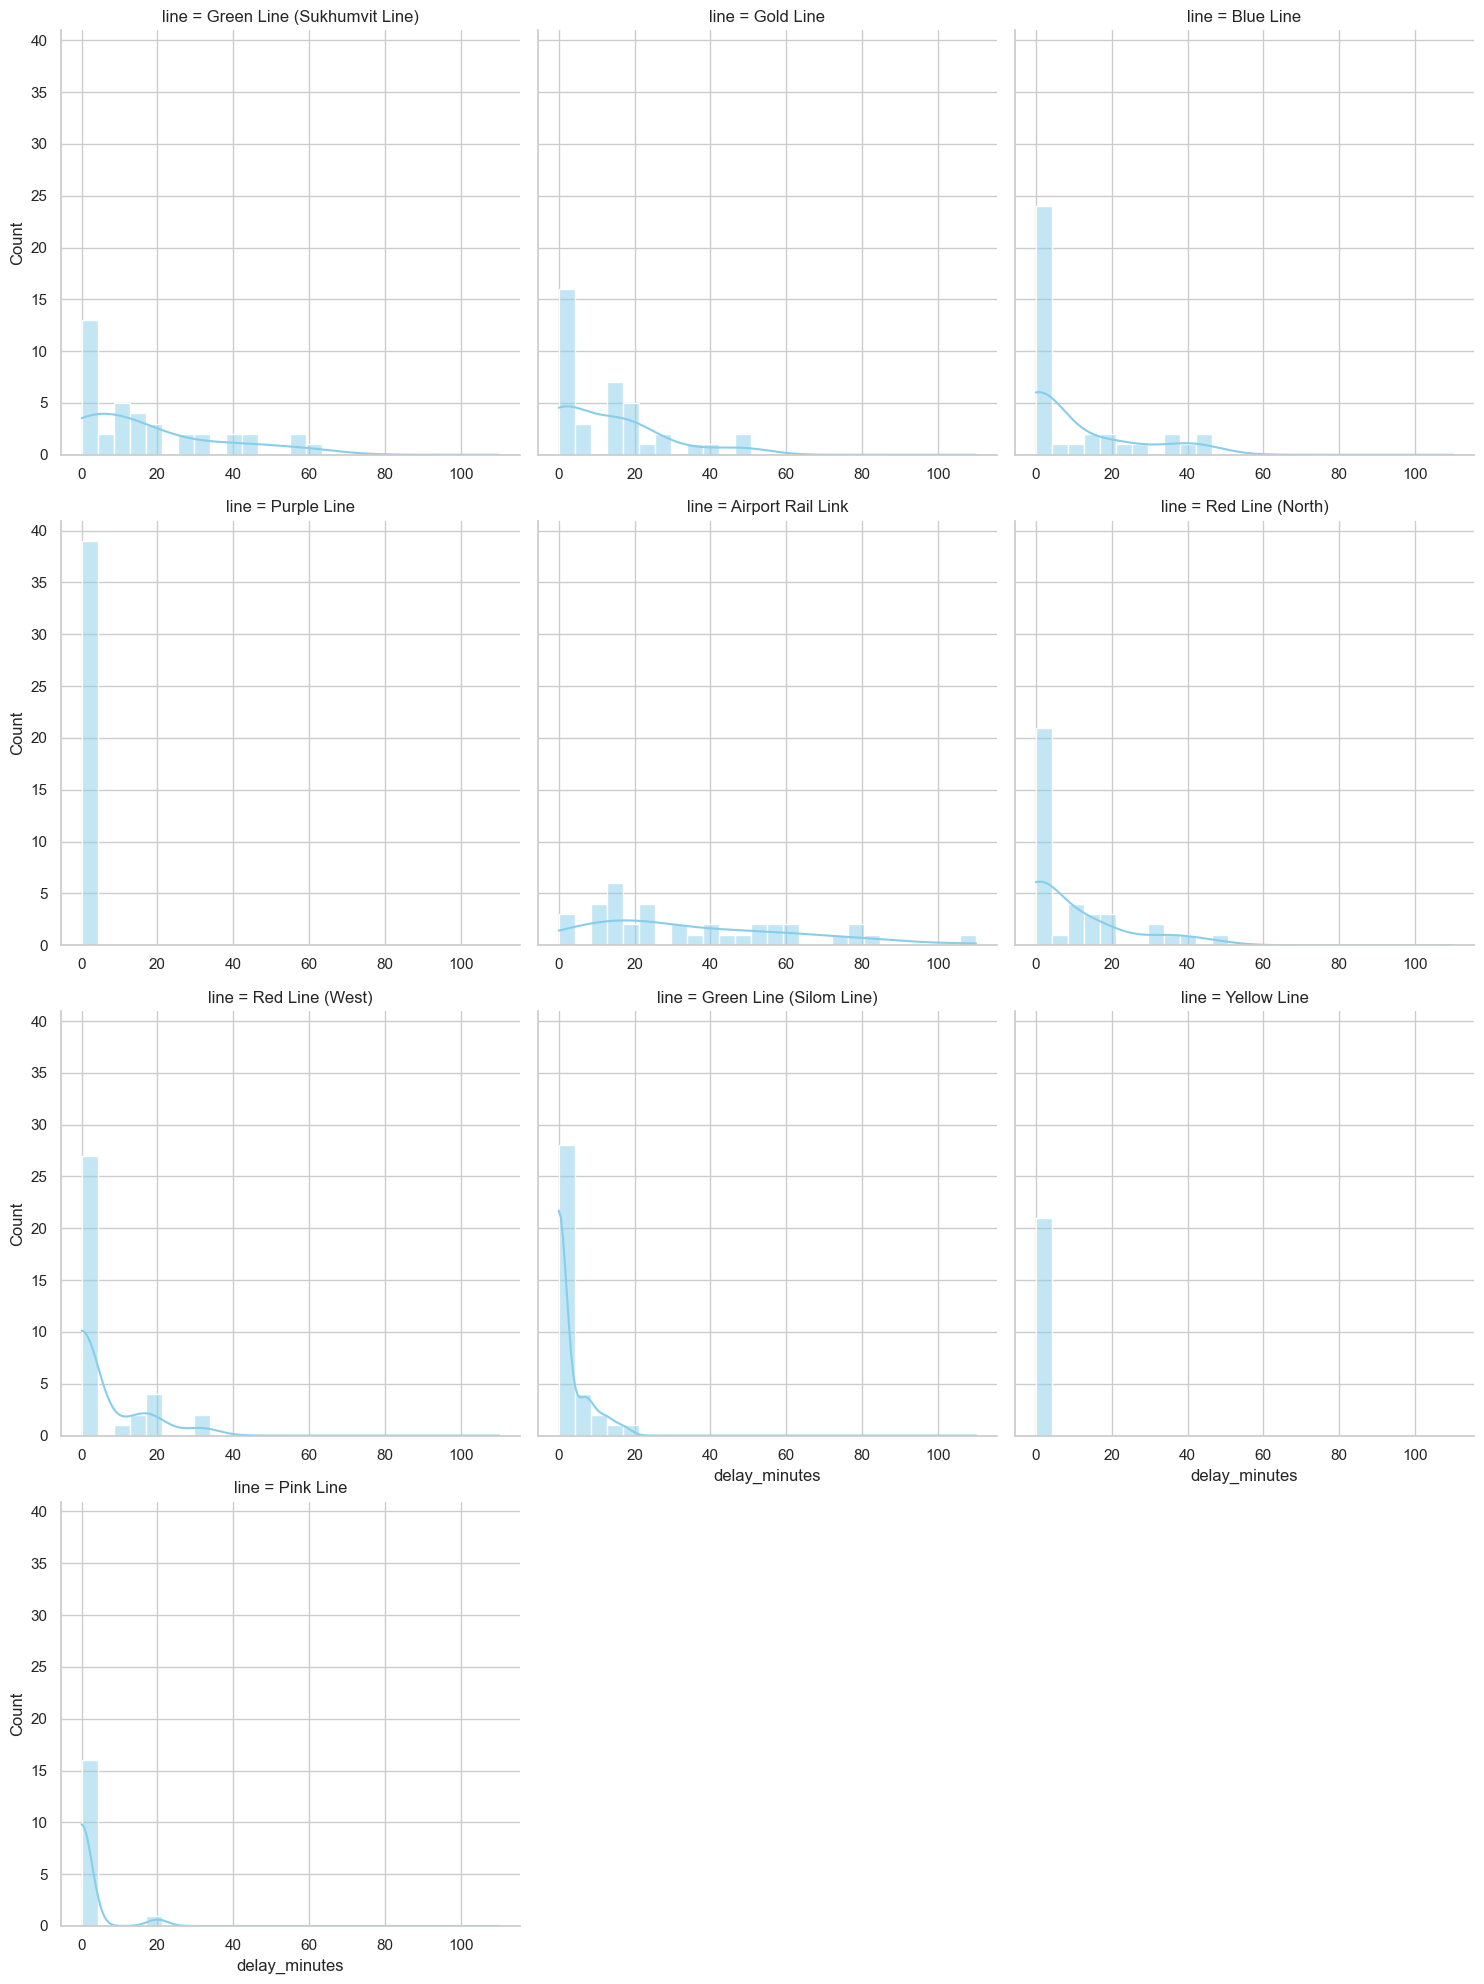

In [ ]:
# พล็อตกราฟ  histogram ดูการกระจายของข้อมูล delay minutes ของรถไฟฟ้าแต่ละสายในสถานการณ์ปกติ เพื่อดูว่าควรใช้ค่าสถิติไหนอธิบายข้อมูล ซึ่งพบว่าข้อมูลแต่ละสายส่วนใหญ่เบ้ขวา เราจึงใช้ Median
g = sns.displot(
    data=df_normal,
    x='delay_minutes',
    col='line',      
    kind='hist',     
    col_wrap=3,      
    kde=True,       
    color='skyblue',
    facet_kws=dict(sharex=False) 
)

In [151]:
# เรียงลำดับเดือนใหม่เพื่อแสดงข้อมูลให้เป็นลำดับ
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
]

df_normal['month'] = pd.Categorical(df_normal['month'], categories=month_order, ordered=True)

C:\Users\phwy3\AppData\Local\Temp\ipykernel_23952\4241918610.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal['month'] = pd.Categorical(df_normal['month'], categories=month_order, ordered=True)


In [152]:
# สร้างตารางสรุปผลโดยแสดงค่ามัธยฐานของ delay minutes ของรถไฟฟ้าแต่ละสาย แยกตามเดือน
monthly_perf = df_normal.pivot_table(index='month', columns='line', values='delay_minutes', aggfunc='median')
monthly_perf = monthly_perf.fillna(0)
monthly_perf

C:\Users\phwy3\AppData\Local\Temp\ipykernel_23952\3406163507.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  monthly_perf = df_normal.pivot_table(index='month', columns='line', values='delay_minutes', aggfunc='median')


line,Airport Rail Link,Blue Line,Gold Line,Green Line (Silom Line),Green Line (Sukhumvit Line),Pink Line,Purple Line,Red Line (North),Red Line (West),Yellow Line
month,,,,,,,,,,
January,52.0,3.0,0.0,0.0,15.0,10.0,0.0,5.0,0.0,0.0
February,20.0,36.0,21.0,0.0,9.0,0.0,0.0,20.0,0.0,0.0
March,30.0,0.0,14.0,0.0,0.0,0.0,0.0,7.0,13.0,0.0
April,33.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
May,45.0,3.0,0.0,0.0,7.0,0.0,0.0,25.0,0.0,0.0
June,14.0,9.5,4.0,0.0,17.0,0.0,0.0,12.5,0.0,0.0
July,83.0,21.5,7.0,0.0,26.5,0.0,0.0,0.0,0.0,0.0
August,20.0,5.0,14.5,0.0,4.5,0.0,0.0,7.0,0.0,0.0
September,10.0,15.0,18.0,0.0,41.0,0.0,0.0,0.0,5.0,0.0


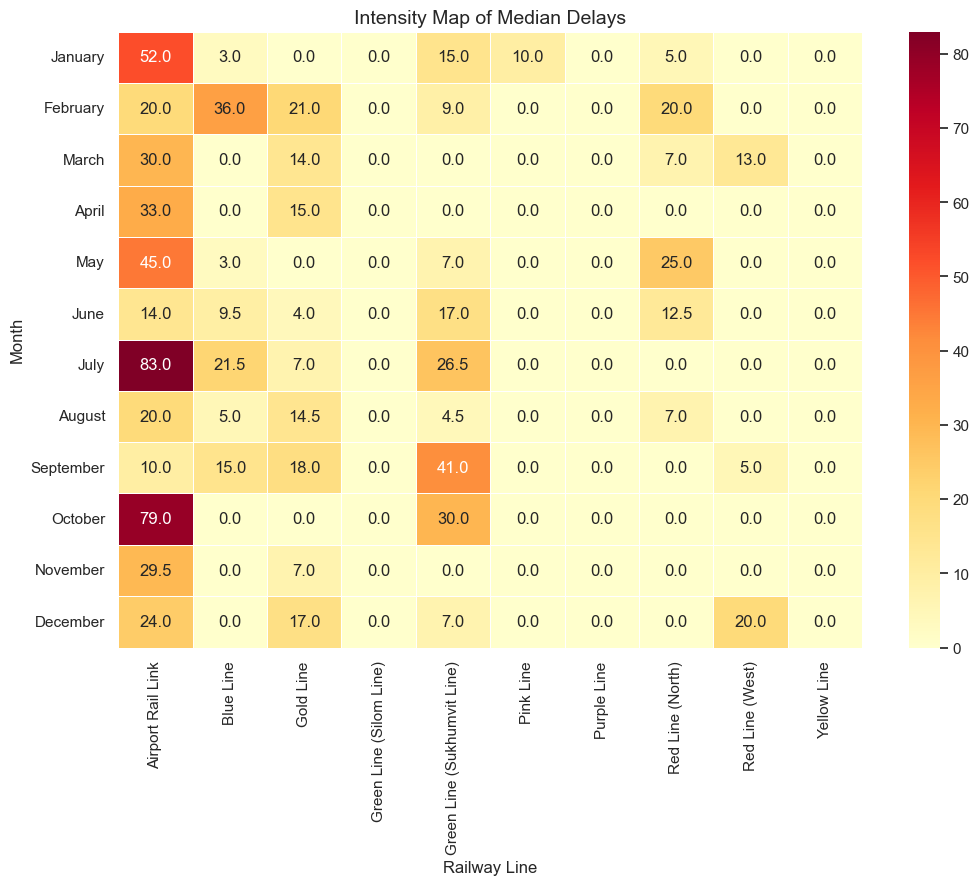

In [ ]:
# พล็อตกราฟ Heatmap ดูค่ามัธยฐานของ delay minutes ของรถไฟฟ้าแต่ละสายแยกตามเดือน
plt.figure(figsize=(12, 8))
sns.heatmap(
    monthly_perf, 
    annot=True,      
    fmt=".1f",       
    cmap="YlOrRd",   
    linewidths=.5
)

plt.title('Intensity Map of Median Delays', fontsize=14)
plt.xlabel('Railway Line')
plt.ylabel('Month')
plt.show()

หลังจากได้ Heat map แสดงค่ามัธยฐานความล่าช้าของรถไฟฟ้าแต่ละสายในแต่ละเดือนตลอดปี 2565 - 2568 ในสถานการณ์ปกติ เราจะดูเหตุขัดข้องที่เกิดขึ้นในเดือนที่มีค่ามัธยฐานความล่าช้ามาก ว่าเกิดจากสาเหตุอะไร

In [154]:
def analyze_root_causes(df, target_month, target_line):
    """หาสาเหตุหลัก 3 อันดับที่ทำให้รถไฟฟ้าแต่ละสายเกิดความล่าช้า"""
    causes_cols = [
        'traction_sys', 'brake_sys', 'door_sys', 'electric_sys', 
        'rail_sys', 'turnout_machine', 'axel_counter', 
        'signalling_sys', 'external_factors', 'others'
    ]
    
    # ดึงข้อมูลเฉพาะเดือนและสายที่ต้องการ
    mask = (df['month'] == target_month) & (df['line'] == target_line)
    filtered_data = df[mask]
    
    if filtered_data.empty:
        return "ไม่พบข้อมูล"

    # รวมจำนวนครั้งที่เกิดเหตุในแต่ละระบบ
    sum_causes = filtered_data[causes_cols].sum().sort_values(ascending=False)
    
    # หา Top 3 สาเหตุหลัก
    top_3 = sum_causes.head(3)
    
    print(f"--- วิเคราะห์สาเหตุหลักของ {target_line} ในเดือน {target_month} ---")
    for system, count in top_3.items():
        if count > 0:
            percentage = (count / filtered_data['accident_count'].sum()) * 100
            print(f"- {system}: เกิดเหตุ {int(count)} ครั้ง ({percentage:.1f}%)")

analyze_root_causes(df_normal, 'January', 'Airport Rail Link')
analyze_root_causes(df_normal, 'March', 'Airport Rail Link')
analyze_root_causes(df_normal, 'April', 'Airport Rail Link')
analyze_root_causes(df_normal, 'May', 'Airport Rail Link')
analyze_root_causes(df_normal, 'July', 'Airport Rail Link')
analyze_root_causes(df_normal, 'October', 'Airport Rail Link')
analyze_root_causes(df_normal, 'September', 'Green Line (Sukhumvit Line)')

--- วิเคราะห์สาเหตุหลักของ Airport Rail Link ในเดือน January ---
- traction_sys: เกิดเหตุ 7 ครั้ง (58.3%)
- brake_sys: เกิดเหตุ 3 ครั้ง (25.0%)
- door_sys: เกิดเหตุ 1 ครั้ง (8.3%)
--- วิเคราะห์สาเหตุหลักของ Airport Rail Link ในเดือน March ---
- traction_sys: เกิดเหตุ 6 ครั้ง (46.2%)
- turnout_machine: เกิดเหตุ 2 ครั้ง (15.4%)
- signalling_sys: เกิดเหตุ 2 ครั้ง (15.4%)
--- วิเคราะห์สาเหตุหลักของ Airport Rail Link ในเดือน April ---
- traction_sys: เกิดเหตุ 4 ครั้ง (57.1%)
- others: เกิดเหตุ 2 ครั้ง (28.6%)
- brake_sys: เกิดเหตุ 1 ครั้ง (14.3%)
--- วิเคราะห์สาเหตุหลักของ Airport Rail Link ในเดือน May ---
- traction_sys: เกิดเหตุ 5 ครั้ง (41.7%)
- brake_sys: เกิดเหตุ 5 ครั้ง (41.7%)
- door_sys: เกิดเหตุ 1 ครั้ง (8.3%)
--- วิเคราะห์สาเหตุหลักของ Airport Rail Link ในเดือน July ---
- brake_sys: เกิดเหตุ 7 ครั้ง (50.0%)
- turnout_machine: เกิดเหตุ 2 ครั้ง (14.3%)
- traction_sys: เกิดเหตุ 1 ครั้ง (7.1%)
--- วิเคราะห์สาเหตุหลักของ Airport Rail Link ในเดือน October ---
- traction_sys: เกิดเหตุ 3 

จากกราฟ Heatmap แสดงค่ามัธยฐานความล่าช้าแยกตามเดือนในสถานการณ์ปกติ รวมตั้งแต่ปี 2565 ถึงปี 2568 แสดงความเชื่อมโยงระหว่างช่วงเวลากับประสิทธิภาพการเดินรถ และการวิเคราะห์สาเหตุหลักของรถไฟฟ้าบางสายที่มีความล่าช้าแต่ละเดือนมากพบว่า:
- รถไฟฟ้า Airport Rail Link มีค่ามัธยฐานของความล่าช้าสูงมากในเดือนมกราคม มีนาคม เมษายน พฤษภาคม กรกฎาคมและตุลาคม ซึ่งค่ามัธยฐานบ่งบอกกว่ามีโอกาสกว่า 50% ที่ผู้โดยสารจะเจอความล่าช้าน้อยกว่าค่าที่กำหนด และโอกาสอีก 50% ที่ผู้โดยสารจะเจอความล่าช้ามากกว่าค่าที่กำหนด
    - เดือนมกราคม มีค่ามัธยฐานความล่าช้าอยู่ที่ 52 นาที เหตุขัดข้อง 3 อันดับแรกที่เกิดคือ:
        - ระบบขับเคลื่อนของรถไฟฟ้า 7 ครั้ง คิดเป็น 58.3% 
        - ระบบเบรก 3 ครั้ง คิดเป็น 25% 
        - ระบบประตู 1 ครั้ง คิดเป็น 8.3 %
    - เดือนมีนาคม มีค่ามัธยฐานความล่าช้าอยู่ที่ 30 นาที เหตุขัดข้อง 3 อันดับแรกที่เกิดคือ:
        - ระบบขับเคลื่อนของรถไฟฟ้า 6 ครั้ง คิดเป็น 46.2% 
        - จุดสับราง 2 ครั้ง คิดเป็น 15.4% 
        - ระบบที่ใช้ควบคุมการเดินรถ 2 ครั้ง คิดเป็น 15.4%
    - เดือนเมษายน มีค่ามัธยฐานความล่าช้าอยู่ที่ 33 นาที เหตุขัดข้อง 3 อันดับแรกที่เกิดคือ:
        - ระบบขับเคลื่อนของรถไฟฟ้า 4 ครั้ง คิดเป็น 57.1% 
        - เหตุขัดข้องอื่น ๆ 2 ครั้ง คิดเป็น 28.6% 
        - ระบบเบรก 1 ครั้ง คิดเป็น 14.3%
    - เดือนพฤษภาคม มีค่ามัธยฐานความล่าช้าอยู่ที่ 45 นาที เหตุขัดข้อง 3 อันดับแรกที่เกิดคือ:
        - ระบบขับเคลื่อนของรถไฟฟ้า 5 ครั้ง คิดเป็น 41.7% 
        - ระบบเบรก 5 ครั้ง คิดเป็น 41.7% 
        - ระบบประตู 1 ครั้ง คิดเป็น 8.3%
    - เดือนกรกฎาคม มีค่ามัธยฐานความล่าช้าอยู่ที่ 83 นาที เหตุขัดข้อง 3 อันดับแรกที่เกิดคือ:
        - ระบบเบรก 7 ครั้ง คิดเป็น 50% 
        - จุดสับราง 2 ครั้ง คิดเป็น 14.3% 
        - ระบบขับเคลื่อน 1 ครั้ง คิดเป็น 7.1%
    - เดือนตุลาคม มีค่ามัธยฐานความล่าช้าอยู่ที่ 79 นาที เหตุขัดข้อง 3 อันดับแรกที่เกิดคือ:
        - ระบบขับเคลื่อน 3 ครั้ง คิดเป็น 25% 
        - ระบบเบรก 3 ครั้ง คิดเป็น 25% 
        - ระบบที่ใช้ควบคุมการเดินรถ 3 ครั้ง คิดเป็น 25%
- รถไฟฟ้าสายสีเขียว(สุขุมวิท) มีค่ามัธยฐานของความล่าช้าสูงมากในเดือนกันยายน ซึ่งค่ามัธยฐานบ่งบอกกว่ามีโอกาสกว่า 50% ที่ผู้โดยสารจะเจอความล่าช้าน้อยกว่าค่าที่กำหนด และโอกาสอีก 50% ที่ผู้โดยสารจะเจอความล่าช้ามากกว่าค่าที่กำหนด
    - เดือนกันยายน มีค่ามัธยฐานความล่าช้าอยู่ที่ 41 นาที เหตุขัดข้อง 3 อันดับแรกที่เกิดคือ:
        - ระบบประตู 2 ครั้ง คิดเป็น 33.3% 
        - ระบบขับเคลื่อน 1 ครั้ง คิดเป็น 16.7% 
        - ระบบไฟฟ้า 1 ครั้ง คิดเป็น 16.7%

จากการวิเคราะห์สาเหตุของเหตุขัดข้องที่นำไปสู่ระยะเวลาล่าช้าที่มากนั้นพบว่า รถไฟฟ้า Airport Rail Link พบว่า
- ระบบขับเคลื่อนมีปัญหา 26 ครั้ง 
- ระบบเบรกมีปัญหา 19 ครั้ง 
ซึ่งเป็นสาเหตุอันดับ 1 และ 2 ที่ทำให้เกิดความล่าช้ามาก 

จึงอาจต้องมีการตรวจสอบบริเวณสองระบบนี้อย่างดีเป็นพิเศษ

In [155]:
# หาค่ามัธยฐานของความล่าช้าโดยแยกแต่ละสาย รวมทุกเดือนและทุกปี
annual_median_normal = df_normal.groupby('line')['delay_minutes'].median().sort_values(ascending=False)
annual_median_normal

line
Airport Rail Link              25.0
Gold Line                      11.0
Green Line (Sukhumvit Line)    11.0
Blue Line                       0.0
Green Line (Silom Line)         0.0
Pink Line                       0.0
Purple Line                     0.0
Red Line (North)                0.0
Red Line (West)                 0.0
Yellow Line                     0.0
Name: delay_minutes, dtype: float64

C:\Users\phwy3\AppData\Local\Temp\ipykernel_23952\1327318989.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


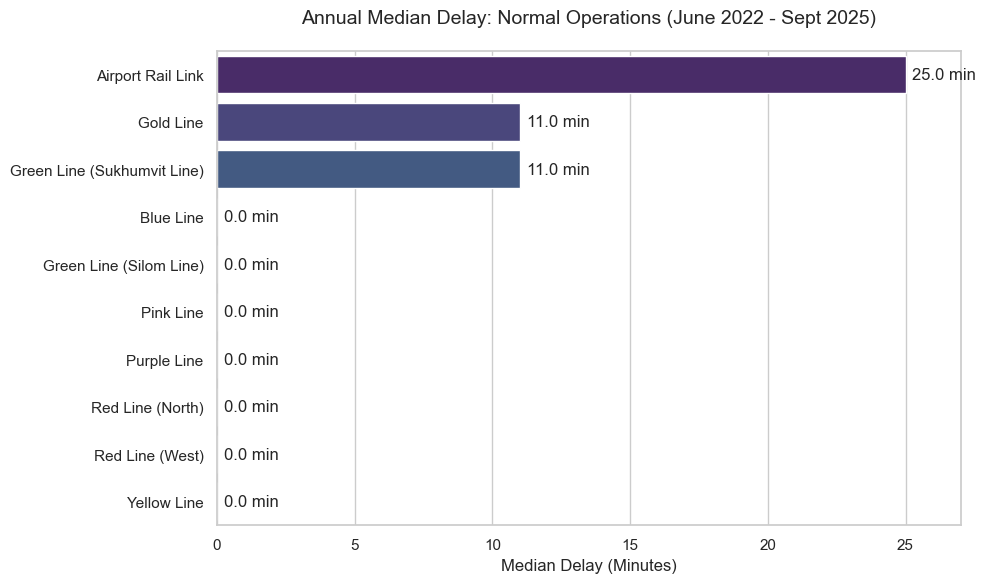

In [ ]:
# พล็อตกราฟแท่งแสดงค่ามัธยมฐานความล่าช้าของรถไฟฟ้าแต่ละสาย รวมทุุกเดือนและทุกปี
plot_data = annual_median_normal.reset_index()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=plot_data, 
    x='delay_minutes', 
    y='line', 
    palette='viridis'
)

for p in ax.patches:
    ax.annotate(f'{p.get_width():.1f} min', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center', 
                xytext=(5, 0), 
                textcoords='offset points')

plt.title('Annual Median Delay: Normal Operations (June 2022 - Sept 2025)', fontsize=14, pad=20)
plt.xlabel('Median Delay (Minutes)')
plt.ylabel('')
plt.xlim(0, plot_data['delay_minutes'].max() + 2) 

plt.tight_layout()
plt.show()

จากกราฟแสดงแสดงค่ามัธยฐานของความล่าช้าสะสมรายปีของรถไฟฟ้าแต่ละสายในสถานการณ์ปกติตั้งแต่เดือนมิถุนายน ปี 2565 ถึง เดือนกันยายน ปี 2568 
- รถไฟฟ้าสายสีน้ำเงิน, สายสีเขียว(สีลม), สายสีชมพู, สายสีม่วง, สายสีแดง(เหนือ), สายสีแดง(ตะวันตก) และสายสีเหลือง เป็นสายที่เวลาของรถไฟฟ้ามีความเสถียรที่สุด โดยเหตุขัดข้องส่วนใหญ่ที่เกิดขึ้นถูกแก้ไขได้เร็วทำให้ไม่กระทบต่อเวลาการเดินรถของคนส่วนใหญ่
- รถไฟฟ้าสายสีเขียว (สุขุมวิท) และสายสีทองมีค่ามัธยฐานของความล่าช้าสะสมรายปีอยู่ที่ 11 นาทีแสดงว่าผู้โดยสารมีโอกาส 50% ที่จะเจอความล่าช้ามากกว่าหรือน้อยกว่า 11 นาที 
- รถไฟฟ้า Airport Rail Link มีค่ามัธยฐานความล่าช้าสูงที่สุด นั้นคือ 25 นาที แสดงว่าผู้โดยสารมีโอกาสเจอความล่าช้าเกือบครึ่งชั่วโมงเป็นเรื่องปกติ แม้ในวันที่ไม่มีเหตุขัดข้องรุนแรง

In [157]:
def analyze_annual_reliability_by_line(df):
    """หาระบบที่เกิดเหตุขัดข้องบ่อยที่สุดในแต่ละปีของรถไฟฟ้าแต่ละสาย"""
    causes_cols = ['traction_sys', 'brake_sys', 'door_sys', 'electric_sys', 
                   'rail_sys', 'turnout_machine', 'axel_counter', 
                   'signalling_sys', 'external_factors', 'others']
    
    print("=== ระบบที่เสียบ่อยที่สุดรายปี แยกรายสาย ===")
    # วนลูปแยกตามปีและสาย
    for year in sorted(df['year'].unique()):
        print(f"\n--- ปี {year} ---")
        year_data = df[df['year'] == year]
        for line in year_data['line'].unique():
            line_data = year_data[year_data['line'] == line]
            top_cause = line_data[causes_cols].sum().sort_values(ascending=False).head(1)
            
            if top_cause.values[0] > 0:
                print(f"สาย {line}: เสียบ่อยที่สุดคือ '{top_cause.index[0]}' ({int(top_cause.values[0])} ครั้ง)")

analyze_annual_reliability_by_line(df_normal)

=== ระบบที่เสียบ่อยที่สุดรายปี แยกรายสาย ===

--- ปี 2565 ---
สาย Green Line (Sukhumvit Line): เสียบ่อยที่สุดคือ 'traction_sys' (5 ครั้ง)
สาย Gold Line: เสียบ่อยที่สุดคือ 'rail_sys' (1 ครั้ง)
สาย Blue Line: เสียบ่อยที่สุดคือ 'traction_sys' (6 ครั้ง)
สาย Airport Rail Link: เสียบ่อยที่สุดคือ 'traction_sys' (8 ครั้ง)
สาย Red Line (North): เสียบ่อยที่สุดคือ 'traction_sys' (4 ครั้ง)
สาย Red Line (West): เสียบ่อยที่สุดคือ 'door_sys' (2 ครั้ง)
สาย Green Line (Silom Line): เสียบ่อยที่สุดคือ 'traction_sys' (1 ครั้ง)

--- ปี 2566 ---
สาย Green Line (Sukhumvit Line): เสียบ่อยที่สุดคือ 'door_sys' (5 ครั้ง)
สาย Green Line (Silom Line): เสียบ่อยที่สุดคือ 'brake_sys' (1 ครั้ง)
สาย Gold Line: เสียบ่อยที่สุดคือ 'turnout_machine' (11 ครั้ง)
สาย Blue Line: เสียบ่อยที่สุดคือ 'traction_sys' (2 ครั้ง)
สาย Airport Rail Link: เสียบ่อยที่สุดคือ 'traction_sys' (12 ครั้ง)
สาย Red Line (North): เสียบ่อยที่สุดคือ 'traction_sys' (2 ครั้ง)
สาย Red Line (West): เสียบ่อยที่สุดคือ 'traction_sys' (1 ครั้ง)
สาย Yellow Li

จากข้อมูลระบบที่ขัดข้องบ่อยที่สุดรายปี แยกแต่ละสายพบว่า:
- Airport Rail Link มีปัญหาที่ระบบขับเคลื่อน 3 ปีติดต่อกัน ตั้งแต่ 2565 - 2567 และจำนวนครั้งเพิ่มขึ้นเรื่อย ๆ โดยที่:
    - ปี 2565 เกิดปัญหา 8 ครั้ง
    - ปี 2566 เกิดปัญหา 12 ครั้ง
    - ปี 2567 เกิดปัญหา 19 ครั้ง
    แต่ในปี 2568 พบว่าปัญหาที่เกิดบ่อยสุดคือระบบเบรกเกิดปัญหาทั้งหมด 4 ครั้ง
- สายสีทองมีปัญหาที่จุดสับรางต่อเนื่องและรุนแรง โดยที่:
    - ปี 2566 เกิดปัญหา 11 ครั้ง
    - ปี 2567 เกิดปัญหา 8 ครั้ง
    - ปี 2568 เกิดปัญหา 8 ครั้ง

# วิเคราะห์ระยะเวลาล่าช้าที่มากผิดปกติ (Outliers) จากเหตุการณ์ขัดข้องรุนแรง

In [ ]:
# นำข้อมูล outlier มาวิเคราะห์
df_outliers = df[df['is_outlier'] == True]

In [159]:
df_outliers.shape

(34, 20)

In [160]:
df_outliers.head()

,id,month,year,line,owner,operator,accident_count,delay_minutes,solving_time_minutes,traction_sys,brake_sys,door_sys,electric_sys,rail_sys,turnout_machine,axel_counter,signalling_sys,external_factors,others,is_outlier
1,2,June,2565,Green Line (Silom Line),BMA,BTS,1,37,104,0,0,0,0,0,1,0.0,0,0,0,True
12,13,July,2565,Purple Line,MRT,BEM,1,25,129,0,0,0,1,0,0,0.0,0,0,0,True
24,25,September,2565,Green Line (Sukhumvit Line),BMA,BTS,4,92,156,1,1,1,0,0,1,0.0,0,0,0,True
25,26,September,2565,Green Line (Silom Line),BMA,BTS,3,24,35,2,1,0,0,0,0,0.0,0,0,0,True
29,30,September,2565,Airport Rail Link,SRT,AERA1,9,140,547,2,0,1,2,0,3,0.0,0,0,1,True


In [161]:
df_outliers.shape

(34, 20)

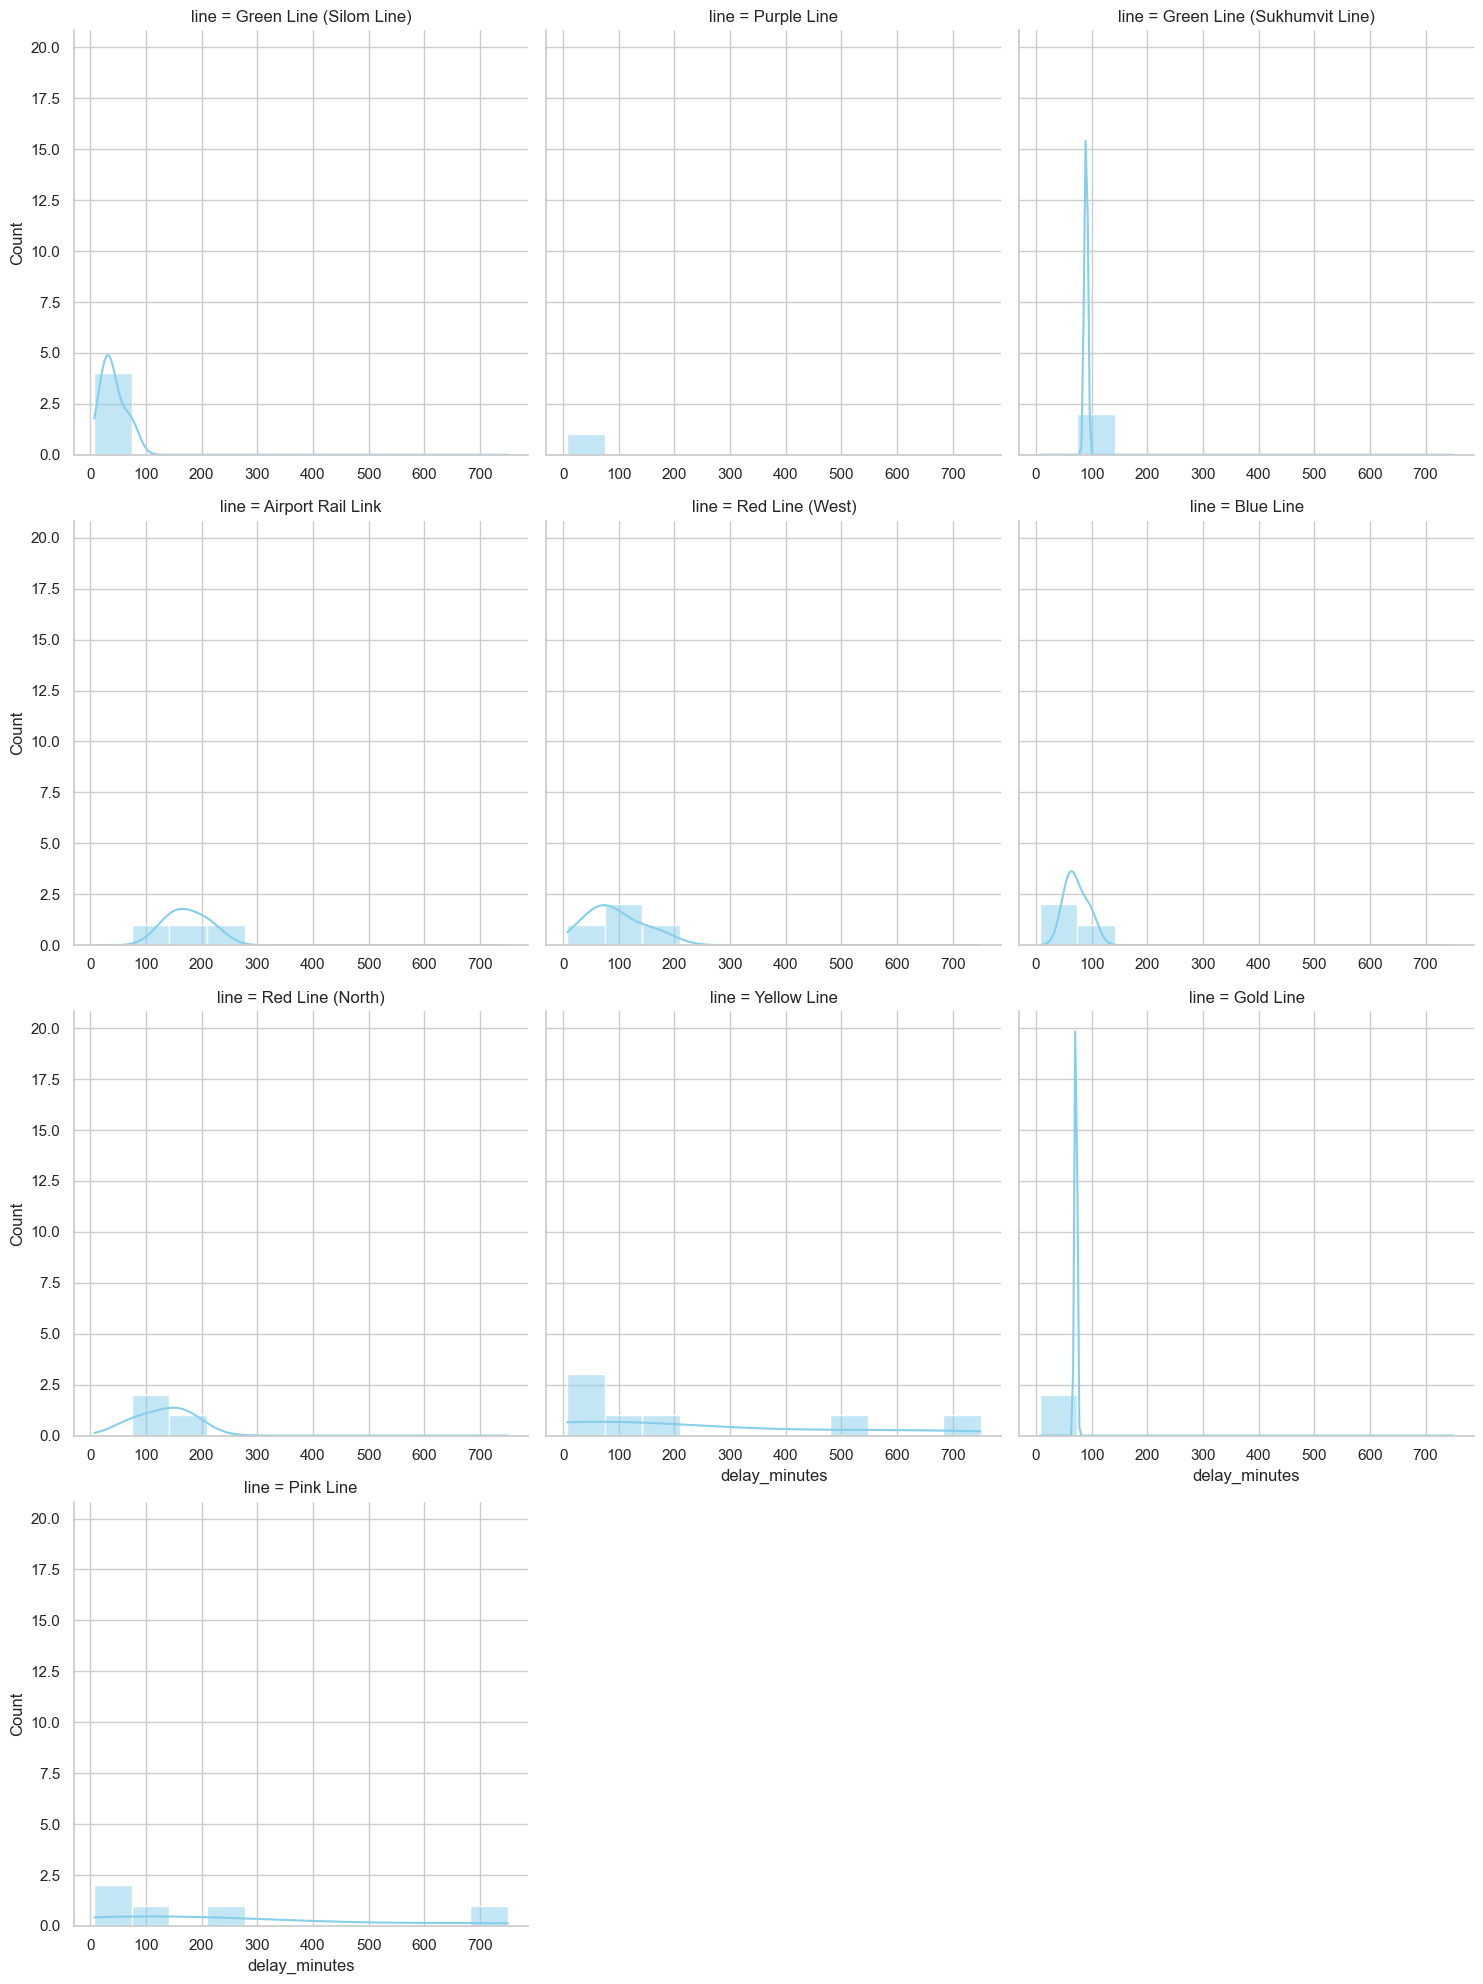

In [ ]:
# พล็อต histogram ดูการกระจายตัวของค่า delay minutes เพื่อดูว่าควรใช้ค่าสถิติอะไรอธิบายข้อมูล พบว่าส่วนใหญ่เบ้ขวา ดังนั้นจะใช้ค่ามัธยฐาน
g = sns.displot(
    data=df_outliers,
    x='delay_minutes',
    col='line',      
    kind='hist',    
    col_wrap=3,      
    kde=True,        
    color='skyblue',
    facet_kws=dict(sharex=False) 
)

In [163]:
# ดูค่ามัธยฐานความล่าช้าผิดปกติของรถไฟฟ้าแต่ละสาย รายปี
outlier_yearly = df_outliers.groupby(['line', 'year'])['delay_minutes'].median().reset_index()
outlier_yearly

,line,year,delay_minutes
0,Airport Rail Link,2565,140.0
1,Airport Rail Link,2566,170.0
2,Airport Rail Link,2567,213.0
3,Blue Line,2566,61.5
4,Blue Line,2567,95.0
5,Gold Line,2566,71.5
6,Green Line (Silom Line),2565,30.5
7,Green Line (Silom Line),2566,51.0
8,Green Line (Sukhumvit Line),2565,92.0
9,Green Line (Sukhumvit Line),2566,88.0


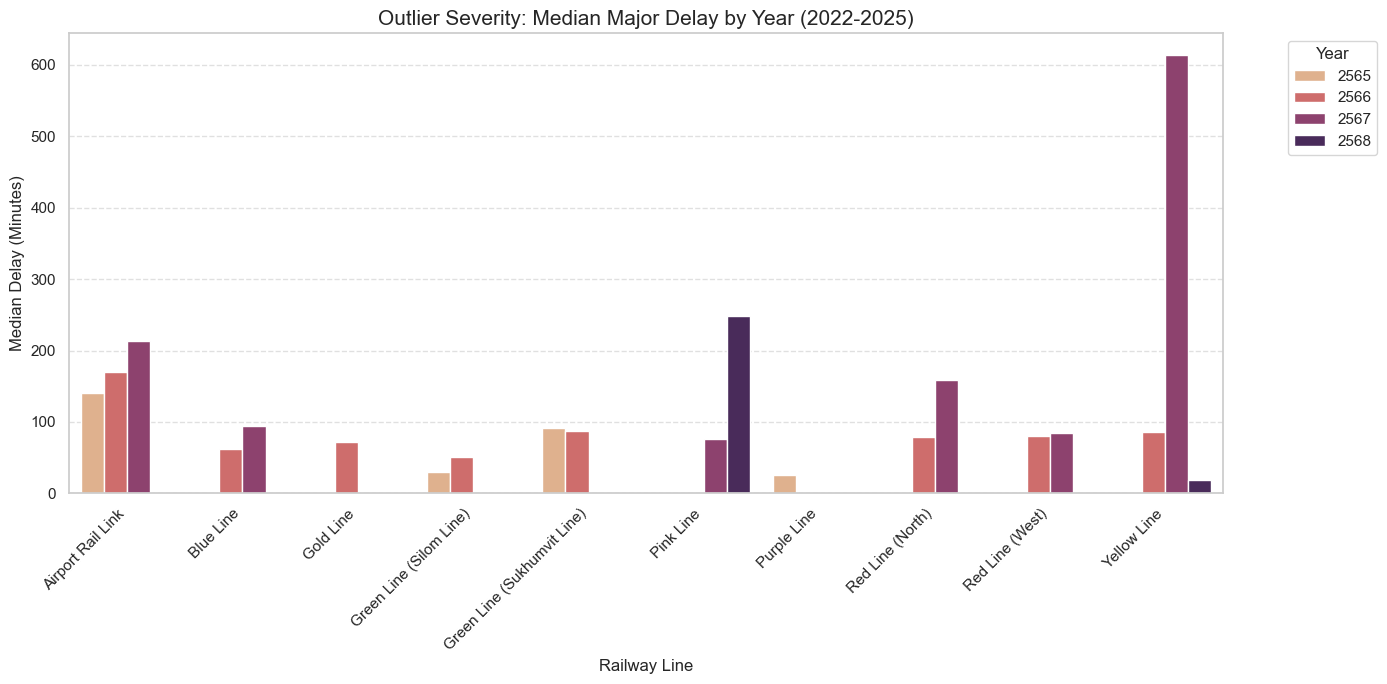

In [164]:
# พล็อตกราฟแท่งดูค่ามัธยฐานความล่าช้าผิดปกติของรถไฟฟ้าแต่ละสาย รายปี เพื่อเปรียบเทียบกัน
plt.figure(figsize=(14, 7))
sns.barplot(
    data=outlier_yearly, 
    x='line', 
    y='delay_minutes', 
    hue='year', 
    palette='flare' 
)

plt.title('Outlier Severity: Median Major Delay by Year (2022-2025)', fontsize=15)
plt.ylabel('Median Delay (Minutes)')
plt.xlabel('Railway Line')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

จากกราฟแสดงค่ามัธยฐานความล่าช้าที่มากผิดปกติ (outliers) รายปี แยกตามสายรถไฟฟ้า ในที่นี้ outliers หมายถึงเหตุการณ์ขัดข้องรุนแรงที่ทำให้เกิดความล่าช้าสูงเกินกว่าปกติ  ข้อมูลนี้เป็นสถิติถึงเดือนกันยายนปี 2568 โดยจากกราฟจะเห็นว่า
- รถไฟฟ้าสายสีม่วงมีการจัดการกับปัญหาได้ดีเนื่องจากพบว่ามีการเกิดเหตุขัดข้องรุนแรงขึ้นในปี 2565 แล้วหลังจากนั้นไม่มีเหตุการณ์ขัดข้องรุนแรงเกิดขึ้นอีกเลย
- รถไฟฟ้าสายสีเหลืองมีเหตุขัดข้องรุนแรงในปี 2567 ที่ทำให้เวลาล่าช้าพุ่งสูงถึงประมาณ 613.5 นาที หรือประมาณ 10 ชั่วโมง ซึ่งต่อมาในปี 2568 พบว่าเหตุขัดข้องรุนแรงที่ทำให้เกิดความล่าช้ามากผิดปกติเหลือแค่ 19 นาทีโดยประมาณแสดงให้เห็นถึงการรับมือกับปัญหาที่ดีมากขึ้น
- รถไฟฟ้าสายสีทอง สายสีเขียว(สุขุมวิทและสีลม) พบว่าเกิดเหตุขัดข้องรุนแรงครั้งสุดท้ายคือปี 2566 แล้วไม่เกิดขึ้นอีกเลยหลังจากนั้น ซึ่งก็แสดงให้เห็นถึงการปรับปรุงระบบรางและตัวรถได้ดีขึ้น
- รถไฟฟ้า Airport Link พบว่าในปี 2565-2567 มีเหตุการขัดข้องรุนแรงเกิดขึ้นทุกปีและทำให้เกิดปัญหาความล่าช้าที่มากผิดปกติมากขึ้นทุกปีแสดงให้เห็นถึงการจัดการปัญหาที่ยังไม่ดีพอ 

In [165]:
def analyze_outlier_causes_by_line(df_outlier):
    """หาสาเหตุหลักของความล่าช้าผิดปกติของรถไฟฟ้าแต่ละสาย"""
    causes_cols = ['traction_sys', 'brake_sys', 'door_sys', 'electric_sys', 
                   'rail_sys', 'turnout_machine', 'axel_counter', 
                   'signalling_sys', 'external_factors', 'others']
    
    print("=== ระบบที่เป็นต้นเหตุของเหตุการณ์วิกฤต (Outlier) แยกรายสาย ===")
    # วนลูปรายสาย
    for line in df_outlier['line'].unique():
        line_data = df_outlier[df_outlier['line'] == line]
        top_cause = line_data[causes_cols].sum().sort_values(ascending=False).head(1)
        
        if top_cause.values[0] > 0:
            print(f"สาย {line}: มักพังหนักที่ระบบ '{top_cause.index[0]}' ({int(top_cause.values[0])} ครั้ง)")

analyze_outlier_causes_by_line(df_outliers)

=== ระบบที่เป็นต้นเหตุของเหตุการณ์วิกฤต (Outlier) แยกรายสาย ===
สาย Green Line (Silom Line): มักพังหนักที่ระบบ 'traction_sys' (2 ครั้ง)
สาย Purple Line: มักพังหนักที่ระบบ 'electric_sys' (1 ครั้ง)
สาย Green Line (Sukhumvit Line): มักพังหนักที่ระบบ 'door_sys' (3 ครั้ง)
สาย Airport Rail Link: มักพังหนักที่ระบบ 'traction_sys' (6 ครั้ง)
สาย Red Line (West): มักพังหนักที่ระบบ 'axel_counter' (4 ครั้ง)
สาย Blue Line: มักพังหนักที่ระบบ 'turnout_machine' (2 ครั้ง)
สาย Red Line (North): มักพังหนักที่ระบบ 'turnout_machine' (3 ครั้ง)
สาย Yellow Line: มักพังหนักที่ระบบ 'turnout_machine' (7 ครั้ง)
สาย Gold Line: มักพังหนักที่ระบบ 'turnout_machine' (9 ครั้ง)
สาย Pink Line: มักพังหนักที่ระบบ 'turnout_machine' (3 ครั้ง)


จากข้อมูลระบบที่เป็นสาเหตุหลักที่ทำให้รถไฟฟ้าเกิดการความล่าช้าแบบผิดปกติพบว่า:
- รถไฟฟ้า Airport Rail Link และ รถไฟฟ้าสายสีเขียว (สีลม) มีปัญหาหลักที่ระบบขับเคลื่อน โดยเฉพาะ Airport Rail Link มีปัญหาที่ระบบขับเคลื่อน 6 ครั้ง แสดงให้เห็นว่าเมื่อเกิดเหตุขัดข้องที่ระบบขับเคลื่อนที่ใช้เวลาในการแก้ปัญหานาน ส่งผลให้เกิดความล่าช้าสะสมสูง
- รถไฟฟ้าสายสีม่วงมีปัญหาที่ระบบไฟฟ้าทำให้เกิดความล่าช้ามาก
- รถไฟฟ้าสายสีน้ำเงิน, สายสีแดง(เหนือ), สายสีเหลือง, สายสีทองและสายสีชมพู พบว่ามีปัญหาที่จุดสับรางเยอะที่สุดจนเป็นต้นเหตุให้เกิดความล่าช้าที่ผิดปกติ
- รถไฟฟ้าสายสีเขียว (สุขุมวิท) มีปัญหาที่ระบบประตู 3 ครั้ง จนเป็นเหตุให้เกิดความล่าช้าที่ผิดปกติมากที่สุด
- รถไฟฟ้าสายสีแดง (ตะวันตก) มีปัญหาที่ระบบเครื่องนับเพลา 4 ครั้ง ซึ่งเป็นสาเหตุหลักที่ทำให้เกิดความล้าช้าผิดปกติ